# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ilyasa Rafi Azhar
- **Email:** ilyasaxra@gmail.com
- **ID Dicoding:** m_ilyasa_rafi

## Menentukan Pertanyaan Bisnis

- Pada musim apa perentalan sepeda pada orang kasual memuncak?
- Pada kondisi cuaca apa perentalan sepeda memuncak?

## Import Semua Packages/Library yang Digunakan

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Pertanyaan bisnis yang diajukan hanya merujuk pada satu dataset yaitu day.csv, sehingga hour.csv dapat diabaikan

Memuat data day

In [99]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai data day

In [100]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [101]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa jumlah duplikat dalam day_df

In [102]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dari hasil penilaian dari tabel day_df, terjadi kesalahan tipe data pada kolom dteday. Setelah itu, beberapa value dari kolom temp, atemp, dan windspeed masih ternomalisasi, yang akan menyulitkan dalam merepresentasikan data.

### Cleaning Data

In [103]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah tipe data kolom dteday

In [104]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [105]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kolom dteday sudah berada pada tipe data yang benar

Mendenormalisasi kolom temp, atemp, hum, dan windspeed

Disini proses denormalisasi dilakukan berdasarkan panduan dalam file Readme.txt, dimana
- Nilai kolom temp (i = 0) dibagi 41 (nilai maksimum)
- Nilai kolom atemp (i = 1) dibagi 50 (nilai maksimum)
- Nilai kolom hum (i = 2) dibagi 100 (nilai maksimum)
- Nilai windspeed (i = 3) dibagi 67 (nilai maksimum)

Dibawah ini didefinisikan fungsi denorm untuk mendenormalisasikan kolom temp, atemp, hum, dan windspeed secara sekaligus.

In [106]:
def denorm(indx,x):
  if indx == 0:
    return x*41
  elif indx == 1:
    return x*50
  elif indx == 2:
    return x*100
  elif indx == 3:
    return x*67

In [107]:
kolom = ['temp','atemp','hum','windspeed']
indx=0
for i in kolom:
  day_df[i] = day_df[i].apply(lambda x: denorm(indx,x))
  indx=indx+1

In [108]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Data sudah berhasil terdenormalisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

Data yang ditampilkan

In [109]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Sekarang, akan diubah kolom season, yr, dan weathersit sesuai dengan arahan file Readme.txt

In [110]:
def map_season(season):
  season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
  return season_map[season]

def map_year(yr):
  yr_map = {0: "2011", 1: "2012"}
  return yr_map[yr]

def map_wthsit(weathersit):
  wthr_map = {1: "Clear", 2: "Misty", 3: "Light Weather", 4: "Heavy Weather"}
  return wthr_map[weathersit]

day_df['weathersit'] = day_df['weathersit'].apply(map_wthsit)
day_df['season'] = day_df['season'].apply(map_season)
day_df['yr'] = day_df['yr'].apply(map_year)

In [111]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data pada kolom season sudah menunjukkan musim, lalu pada kolom yr sudah menunjukkan tahun, dan data pada kolom weathersit sudah menunjukkan situasi cuaca

Berikut akan digabungkan total perentalan sepeda setiap musimnya pada periode 2011 sampai 2012

In [174]:
seasonal_df = day_df.groupby(by=["yr","season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
seasonal_df = seasonal_df.reset_index()
seasonal_df["season"] = seasonal_df["season"] +' ' + seasonal_df["yr"].astype(str)
season_order = ['Spring 2011','Summer 2011','Fall 2011', 'Winter 2011', 'Spring 2012', 'Summer 2012','Fall 2012', 'Winter 2012']
seasonal_df['season'] = pd.Categorical(seasonal_df['season'], categories=season_order, ordered=True)

seasonal_df = seasonal_df.sort_values(by='season')
seasonal_df = seasonal_df.reset_index()
seasonal_df = seasonal_df.drop('index', axis=1)
seasonal_df


,yr,season,casual,registered,cnt
0,2011,Spring 2011,21425,128575,150000
1,2011,Summer 2011,77564,269752,347316
2,2011,Fall 2011,95450,324200,419650
3,2011,Winter 2011,52813,273324,326137
4,2012,Spring 2012,39197,282151,321348
5,2012,Summer 2012,125958,445315,571273
6,2012,Fall 2012,130641,510838,641479
7,2012,Winter 2012,76969,438507,515476


In [153]:
seasonal_df

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Selanjutnya, akan diperiksa maksimum dan minimum perentalan sepeda perharinya

In [115]:
day_df.describe()

,instant,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,6.519836,0.028728,2.997264,0.683995,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,3.451913,0.167155,2.004787,0.465233,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,4.000000,0.000000,1.000000,0.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,7.000000,0.000000,3.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,10.000000,0.000000,5.000000,1.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dari data diatas, terlihat bahwa total perentalan sepeda beredar dari 22 hingga 8714, sehingga akan dikelompokkan menjadi 5 grup, yaitu 0 - 2000, 2001 - 4000, 4001 - 6000, 6001 - 8000, > 8000

In [123]:
day_df["total_group"] = day_df.cnt.apply(lambda x:
                                         "0 - 2000" if x >= 0 and x <= 2000 else (
                                             "2001 - 4000" if x > 2000 and x <= 4000 else(
                                                 "4001 - 6000" if x > 4000 and x <= 6000 else(
                                                     "6001 - 8000" if x > 6000 and x <= 8000 else(
                                                         "> 8000")))))

In [132]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_group
191,192,2011-07-11,Fall,2011,7,0,1,1,Clear,31.262500,36.49020,63.5833,18.916579,723,3363,4086,4001 - 6000
712,713,2012-12-13,Winter,2012,12,0,4,1,Clear,12.129153,14.70940,48.5833,11.666643,425,5107,5532,4001 - 6000
214,215,2011-08-03,Fall,2011,8,0,3,1,Misty,29.998347,33.99685,65.7500,9.084061,467,3107,3574,2001 - 4000
540,541,2012-06-24,Fall,2012,6,0,0,0,Clear,30.476653,33.71270,47.9167,9.750175,2551,4340,6891,6001 - 8000
554,555,2012-07-08,Fall,2012,7,0,0,0,Clear,33.722500,39.51980,57.3750,8.417143,1203,3469,4672,4001 - 6000


Sudah menambah kategori untuk total_group

Selanjutnya, membuat dataframe baru untuk mengetahui situasi cuaca untuk setiap grup perentalan sepeda pada kolom weathersit

In [248]:
conditions_df = day_df.groupby(by=["total_group"]).agg({
    "weathersit": [lambda x: (x == "Clear").sum(), lambda x: (x == "Misty").sum(), lambda x: (x == "Light Weather").sum()]
})
conditions_df.columns = ["Clear", "Misty", "Light Weather"]
conditions_df = conditions_df.reset_index()
conditions_df

,total_group,Clear,Misty,Light Weather
0,0 - 2000,44,41,13
1,2001 - 4000,95,80,6
2,4001 - 6000,184,86,2
3,6001 - 8000,129,39,0
4,> 8000,11,1,0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa perentalan sepeda pada orang kasual memuncak?

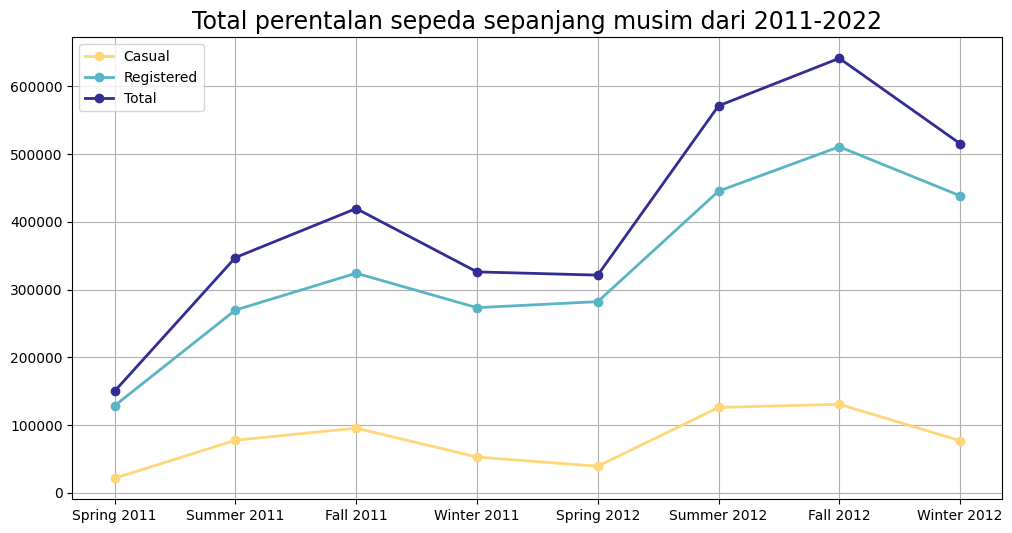

In [216]:
plt.figure(figsize=(12,6))
plt.plot(seasonal_df['season'], seasonal_df['casual'], marker='o', linewidth=2, color="#ffd678",label="Casual")
plt.plot(seasonal_df['season'], seasonal_df['registered'], marker='o', linewidth=2, color="#59B4C3",label="Registered")
plt.plot(seasonal_df['season'], seasonal_df['cnt'], marker='o', linewidth=2, color="#332c92",label="Total")
plt.title("Total perentalan sepeda sepanjang musim dari 2011-2022", fontsize=17)
plt.grid()
plt.legend()
plt.show()

### Pertanyaan 2: Pada kondisi cuaca apa perentalan sepeda memuncak?

Membuat nested bar plot untuk memvisualisasi jumlah cuaca pada setiap grup total

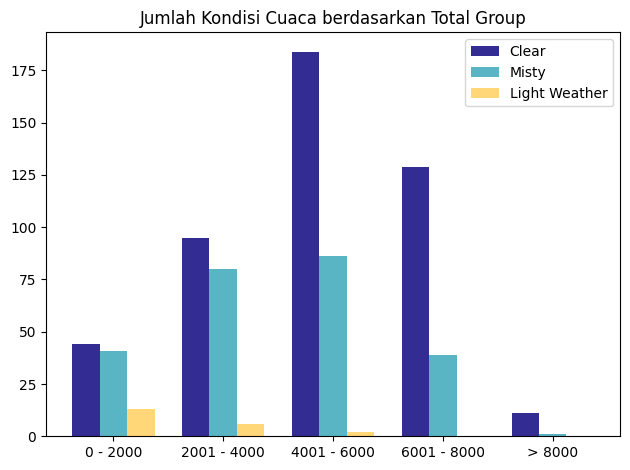

In [279]:
x = np.arange(len(conditions_df['total_group']))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, conditions_df['Clear'], width, label='Clear',color="#332c92")
rects2 = ax.bar(x, conditions_df['Misty'], width, label='Misty', color= "#59B4C3")
rects3 = ax.bar(x + width, conditions_df['Light Weather'], width, label='Light Weather',color="#ffd678")

ax.set_title('Jumlah Kondisi Cuaca berdasarkan Total Group')
ax.set_xticks(x)
ax.set_xticklabels(conditions_df['total_group'])
ax.legend()

fig.tight_layout()

plt.show()

## Conclusion

- Dapat disimpulkan bahwa perentalan sepeda memuncak pada musim gugur pada tahun 2012, dimana mencapai lebih dari 600.000 sepeda yang dirental, dimana sekitar 500.000 dari perental tersebut sudah terdaftar, sedangkan sekitar 100.000 dari pengguna rental sepeda hanya pengguna kasual
- Dapat disimpulkan bahwa banya semakin bersih cuaca, semakin banyak yang merental sepeda. Dapat dilihat dari plot tersebut, jumlah cuaca bersih memuncaki kedudukan di setiap grup, kemudian diikuti dengan cuaca yang berkabut yang masih menjadi pilihan untuk bersepeda bagi para pengguna, dan terakhir sedikit bercuaca buruk